<a href="https://colab.research.google.com/github/adityacyan/ml_learning_codenotebook/blob/main/Fine_Tuning_DistilBERT_for_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [2]:
import pandas as pd
!pip install datasets
from huggingface_hub import list_datasets

In [3]:
all_datasets = list_datasets()

In [4]:
'dair-ai/emotion' in all_datasets

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


False

In [5]:
from datasets import load_dataset

emotion = load_dataset("dair-ai/emotion")
emotion.set_format(type='pandas')

df = emotion['train'][:]

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
#the lables

classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [8]:
df['label_name'] = df['label'].apply(lambda x: classes[x])

In [9]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [10]:
import matplotlib.pyplot as plt


In [11]:
df


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [12]:
label_counts = df['label_name'].value_counts()

Text(0.5, 1.0, 'frq of classes')

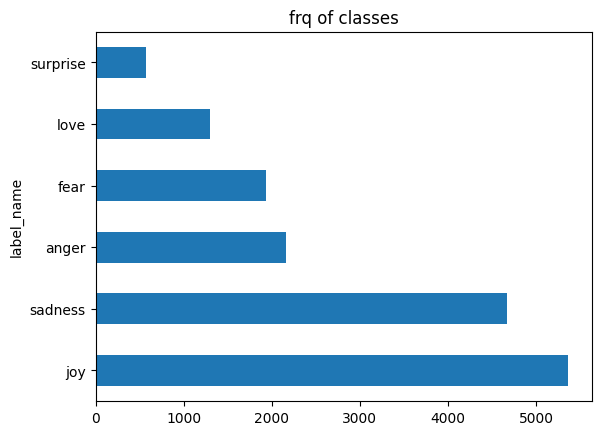

In [13]:
label_counts.plot.barh()
plt.title("frq of classes")

In [14]:
#now we know the dataset is imbalanced so we aint gonna get a good performance with traditional ml (ecept we use imbalance lib)

In [15]:
df['words per tweet'] = df['text'].str.split().apply(len)

<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

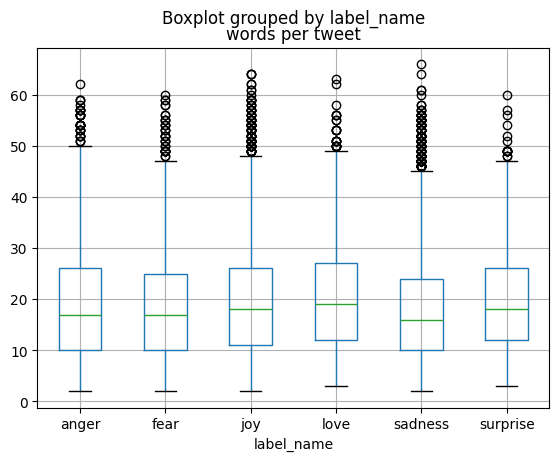

In [16]:
df.boxplot('words per tweet',by = 'label_name')

not much diffrentiating tokens are also less

In [17]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"


tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [18]:
text = ' i like v'
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2066, 1058, 102], 'attention_mask': [1, 1, 1, 1, 1]}


In [19]:
emotion.reset_format()

In [20]:
def tokenize(batch):
    temp = tokenizer(batch['text'],padding = True,truncation = True)
    return temp


print(tokenize(emotion['train'][:2]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [21]:
emotions_encoded = emotion.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [22]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [23]:
inputs = tokenizer(text,return_tensors='pt')

In [24]:
inputs

{'input_ids': tensor([[ 101, 1045, 2066, 1058,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [25]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [26]:
with torch.no_grad():
    outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

distilbert can be used in masking also ie context one

In [27]:
#now we can either fine tune via head or just use direct ml algorithm

In [28]:
from transformers import AutoModelForSequenceClassification


num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
from transformers import TrainingArguments

In [33]:
#build model

batch_size = 64
model_name = 'distilbert-finetuned-emotional'


training_args = TrainingArguments(output_dir= model_name,
                                  num_train_epochs=5,
                                  learning_rate= 2e-5,
                                  per_device_eval_batch_size = batch_size,
                                  per_device_train_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  eval_strategy='epoch',
                                  disable_tqdm = False)

In [35]:
from sklearn.metrics import accuracy_score,f1_score


In [51]:
def compute_metrices(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels,preds,average='weighted')
    acc = accuracy_score(labels,preds)
    return {"accuracy":acc,"f1": f1}


In [52]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [54]:
from transformers import TrainingArguments, Trainer

# Ensure wandb is disabled in TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    disable_tqdm=False,

)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrices,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer
)

<ipython-input-54-b3b52ee62f9b>:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [46]:
trainer.train()

Step,Training Loss
500,0.685300
1000,0.344100
1500,0.272400
2000,0.245000
2500,0.133300
3000,0.170400
3500,0.158100
4000,0.146400
4500,0.103900
5000,0.108600


TrainOutput(global_step=6000, training_loss=0.2130170726776123, metrics={'train_runtime': 694.0138, 'train_samples_per_second': 69.163, 'train_steps_per_second': 8.645, 'total_flos': 1080514292544000.0, 'train_loss': 0.2130170726776123, 'epoch': 3.0})

In [56]:

preds_outputs = trainer.predict(emotions_encoded["test"])
preds_outputs.metrics

{'test_loss': 0.22303235530853271,
 'test_model_preparation_time': 0.0015,
 'test_accuracy': 0.928,
 'test_f1': 0.9275019764486097,
 'test_runtime': 5.8031,
 'test_samples_per_second': 344.645,
 'test_steps_per_second': 43.081}

In [58]:
import numpy as np

y_preds = np.argmax(preds_outputs.predictions,axis=1)
y_true = emotions_encoded['test'][:]['label']

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classes)
print(classification_report(y_true,y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       581
           1       0.95      0.95      0.95       695
           2       0.83      0.81      0.82       159
           3       0.94      0.91      0.93       275
           4       0.88      0.94      0.91       224
           5       0.78      0.68      0.73        66

    accuracy                           0.93      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



In [63]:
text

' i like v'

In [69]:


text = "i like v"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoded_text = tokenizer(text, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**encoded_text)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
classes = ["sadness", "joy", "love", "anger", "fear", "surprise"]
print(classes[pred])

joy


In [ ]:
#yes i feel joy